# Clevr-MRT-v2 in PyTorch

In [30]:
import os
import warnings
warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import transforms
from torch.utils.data import DataLoader

In [ ]:
from torch.utils.data import DataLoader

In [51]:
from IPython.display import Image

In [2]:
os.chdir("..")
os.getcwd()

'/mnt/home/projects/clevr-mrt'

--------

## Load dataset

Here we will load the v2 version of the dataset. This corresponds to the one described in Section 3.1 of [our paper](https://arxiv.org/abs/2212.01639), and comprises a slightly more difficult version of the dataset which involves small objects as well as more extreme camera angles.

Make sure that you have downloaded [ckv2.zip from here](https://drive.google.com/file/d/1GvtvgsNwul3Eg34JAewvM9uxabl--Z1J/view?usp=share_link) and extract it to a folder of your choosing. Also download the [metadata files](https://drive.google.com/file/d/1zJSDZtNPkcJsnVzaB4jPTQibRbbPR0qv/view?usp=share_link).

In [50]:
dataset_train = datasets.ClevrKiwiDataset(
    # for you this will be <savedir>/ck_tmp_v2, if you extracted ckv2.zip into <savedir>
    root_images="/mnt/public/datasets/clevr-mrt/v2/",
    # for you this will be <savedir>/clevr_kiwi_v2_preprocessed,
    # if you extracted ckv2_preprocessed.zip into <savedir>
    root_meta="/mnt/public/datasets/clevr-mrt/v2/metadata",
    mode='train',
    transforms_=[transforms.Resize((128, 128)), transforms.ToTensor()]
)

DEBUG    [datasets.py:176] Loading cache file: /mnt/public/datasets/clevr-mrt/v2/metadata/cache.pkl
INFO     [datasets.py:184] root_images=/mnt/public/datasets/clevr-mrt/v2/, root_meta=/mnt/public/datasets/clevr-mrt/v2/metadata, mode=train
INFO     [datasets.py:187]   # of questions: 374855
INFO     [datasets.py:189]   # of unique scenes: 37499


In [24]:
dataset_test = datasets.ClevrKiwiDataset(
    root_images="/mnt/public/datasets/clevr-mrt/v2/",
    root_meta="/mnt/public/datasets/clevr-mrt/v2/metadata",
    mode='test',
    transforms_=[transforms.Resize((128, 128)), transforms.ToTensor()]
)

DEBUG    [datasets.py:176] Loading cache file: /mnt/public/datasets/clevr-mrt/v2/metadata/cache_test.pkl
INFO     [datasets.py:184] root_images=/mnt/public/datasets/clevr-mrt/v2/, root_meta=/mnt/public/datasets/clevr-mrt/v2/metadata, mode=test
INFO     [datasets.py:187]   # of questions: 99968
INFO     [datasets.py:189]   # of unique scenes: 10000


In [25]:
loader = DataLoader(dataset_test, batch_size=16)

In [26]:
# (img, this_cam) = the image and position of the first camera  
# (img2, this_cam2) = the image and position of the second camera
# this_q = question to be answered from the pov of the canonical camera ('cc')
# this_answer = answer to that question
# cc_cam = position of the canonical camera
img, img2, this_q, this_cam, this_cam2, this_answer, cc_cam, meta = iter(loader).next()

## Visualise

The below diagram is a visual aid of how the dataset is structured. For any given scene, there is the 'canonical' camera which all questions are posed with respect to. The dataset will return a random viewpoint of the scene and its corresponding camera position, and a VQA (visual question answering) model should be given its image, (optionally) its camera coordinates, as well as the question.

For the following code `img, img2, this_q, this_cam, this_cam2, this_answer, cc_cam, meta = iter(loader).next()`:

- `(img, this_cam)` = the image and position of a randomly sampled camera
- `(img2, this_cam2)` = an additional image and position of a randomly sampled camera (used for contrastive learning experiments only)
- `this_q` = question to be answered from the pov of the canonical camera ('cc')
- `this_answer` = answer to that question
- `cc_cam` = position of the canonical camera (for debugging purposes only)

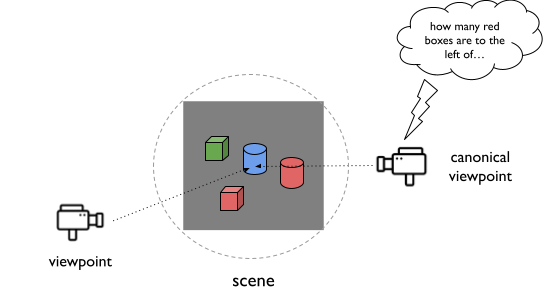

In [53]:
Image("https://raw.githubusercontent.com/christopher-beckham/clevr-mrt/master/clevr-mrt-camera-illustration.png")

In [54]:
img, img2, this_q, this_cam, this_cam2, this_answer, cc_cam, meta = iter(loader).next()

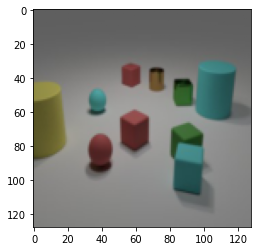

In [39]:
plt.imshow(img[1].permute(1,2,0).numpy())

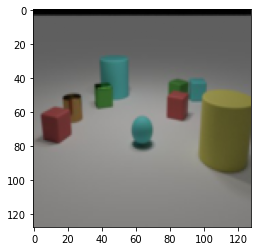

In [40]:
plt.imshow(img2[1].permute(1,2,0).numpy())

In [48]:
# How many objects are in this scene?
meta['n_objects'][1]

tensor(10)

In [44]:
this_cam.shape, this_cam2.shape

(torch.Size([16, 6]), torch.Size([16, 6]))

In [46]:
this_q.shape # tokenized question

torch.Size([16, 45])

In [47]:
meta

{'template_filename': ['na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na',
  'na'],
 'n_color_unique': tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4]),
 'n_shape_unique': tensor([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]),
 'n_mat_unique': tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 'n_objects': tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  8,  8,  8,  8,  8,  8])}